In [1]:
from src.question1 import *
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 1.4 #set the value globally
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

**Problema 1**: Em sistemas termodinâmicos, a distribuição de Boltzmann descreve a probabilidade
de encontrar um sistema em um estado específico com energia $E$. Este conceito é fundamental para
entender fenômenos como equilíbrio térmico e a distribuição de partículas em diferentes níveis de
energia. Considere a distribuição de Boltzmann para o problema do oscilador harmônico *clássico*:

$$
P(x) \propto e^{-\beta E(x)}, \text{ com } E(x) = \frac{1}{2} kx^2,
$$

onde $β = 1/k_BT$ , $k_B$ é a constante de Boltzmann e $T$ é a temperatura. Sob estas condições, a
distribuição de equilíbrio para a coordenada $x$ é gaussiana, com média zero e variância $\sigma = \frac{1}{\beta k}$.


**(a)** Gere valores aleatórios de $x$ a partir de uma distribuição uniforme e aceite-os com probabilidade
proporcional a $P (x)$ (método de rejeição). Assim, obtém-se uma amostra de valores de $x$ que
devem refletir a distribuição de Boltzmann. 


**(b)** Crie um histograma dos valores simulados de $x$ e normalize-o para estimar a densidade de probabilidade empírica. 

**(c)** Sobreponha a curva teórica da distribuição de Boltzmann, dada por:

$$
P_{teórica} (x) = \sqrt{\frac{\beta k}{2\pi}} exp(-\frac{\beta k x^2}{2})
$$

**(d)** Calcule a média e a variância da amostra obtida e compare com os valores teóricos:

$$
\mathbb{E}[x] = 0, Var(x) = 1
βk .
$$

**(e)** Realize os testes estatísticos de Kolmogorov-Smirnov (K-S) e qui-quadrado para avaliar quan-
titativamente se as amostras são consistentes com a distribuição teórica. (**f**) Crie um Q-Q plot
para fornecer uma ferramenta visual adicional de comparação entre a distribuição empírica e a dis-
tribuição teórica. Dessa forma, além da inspeção visual (histograma e curva teórica), a média, a
variância, bem como testes estatísticos e o Q-Q plot, fornecerão evidências quantitativas e gráficas
da qualidade da aproximação Monte Carlo à solução analítica

## Todas as funções essenciais utilizadas no jupyter estão definidas no src/questão1.py

### **Item (a)**

In [2]:
# Item (a) <---------------
# Determina largura da gaussiana
a = 5
n_samples = 50000
# Retorna lista de valores aceitos
samples = rejection_sampling(a, n_samples)
print('Amostras aceitas para distribuição de Boltzmann (Rejection samples)')
print(samples)

Amostras aceitas para distribuição de Boltzmann (Rejection samples)
[-0.6113311117731062, 1.568433476621287, 0.8331274568968672, 0.10949175870296646, -0.1503144418346123, 0.07222589233433396, -1.4853202680812383, 0.5567672537427253, -0.9999385279932218, 0.5422941562007697, -0.5337369189925827, 0.4314370670603571, -0.31727107998292325, 0.11750672377314952, 0.4109781561139556, 0.06830567494460649, -1.0825545052315153, 0.6175156720930843, -0.2528133806682593, 0.4948061948304563, 1.160151823424659, -1.3862707866907886, 0.24005205655558193, -0.18263920428432812, 0.6942170817236324, -0.17341059838907036, -0.41030306399953087, 0.014953834599227278, 0.2114575386308779, -0.45547490936755963, 0.6306415443958251, -0.05791001529580875, -0.5616528367971299, -0.441195800099373, 1.7648419515912241, 0.10483302887668611, 0.25160170019019645, -0.5276189180909654, -0.004792094618531806, 0.4444387829712282, 0.16150081596155452, 0.30548017594556853, -0.37492279757974956, 0.4853375400408595, -1.137929436692

### **Item (b)**

In [16]:
def P_teorica(x):
    return ((beta * k) / 2*np.pi)**(0.5) * np.exp(-(beta * k * x**2)/2)

[0.9776765737651623, 0.9040186533013896, 0.12207139003216394, -1.204506996264704, -1.5567488976101824, -1.4874789718499333, 0.5945237940036137, -1.0272786871301358, -0.3407000338800801, -0.4405840405990187, -1.2406823897990558, -0.07702008829488882, -0.6924286400956445, -0.005519062379648609, -0.4267594832742816, 1.097908017285012, -0.03754579291044724, 0.5343456031625733, -0.3942119640384094, -0.24840184370803708, -0.14077725158989107, -0.07250593888973622, -0.22650825068110247, 0.7576696647969188, -1.3536740189492846, -0.649583140778633, -1.4959458806563557, -0.3766566572326351, -0.19205816931679554, 0.32233862310356365, -0.3941963286241883, 0.5255956107753947, -0.4418097407184236, 1.4906245193071426, -0.9975650572057981, -0.16991674062936024, 0.6717609967279001, -0.04886365497591694, 0.5539560914300212, 1.71986484078925, 1.4156650195152345, -0.712894884612469, 0.9799538606288616, 0.45906560245772887, -0.8287389561195777, -0.7485188877862363, 1.5263456994772016, 0.33742614086155687, 

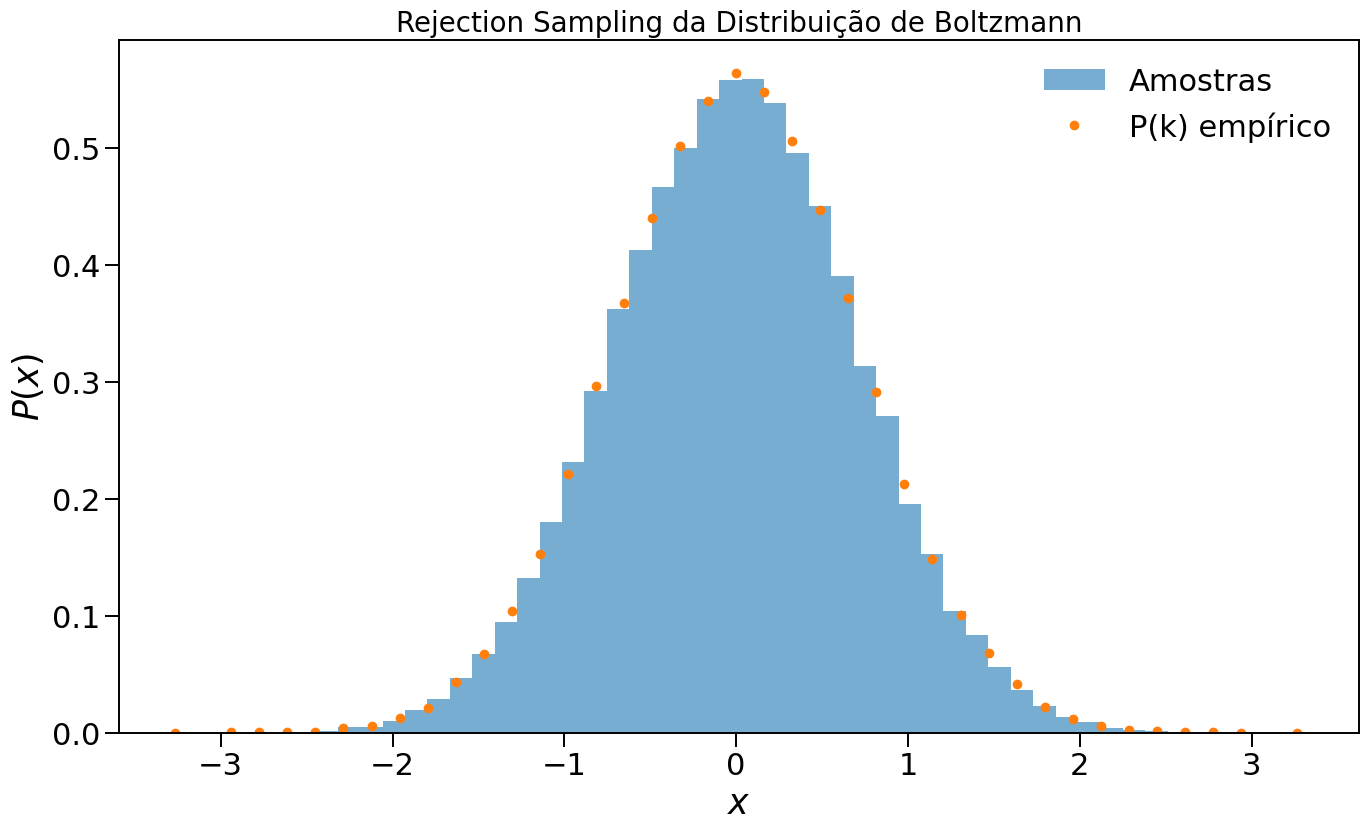

In [5]:
# Item (b) - Plot do Histograma <---------------
# Determina largura da gaussiana
a, m = 4, 50
n_samples = 50000
# Retorna lista de valores aceitos
samples = rejection_sampling(a, n_samples)
k_data, Pk_data = distribution_data(samples, a, m)
print(samples)
# Item (b) <---------------
# Visualizar os resultados
x = np.linspace(-a, a, 1000)
fig = plt.subplots(figsize=(16, 9))
plt.hist(samples, bins=50, density=True, alpha=0.6, label="Amostras")
plt.plot(k_data, Pk_data,'o', label='P(k) empírico')
#plt.plot(x, P(x) / sum(P(x)), label="Distribuição alvo (não normalizada)", color='red')
#plt.plot(samples, P(samples) / sum(P(samples)), label="Distribuição alvo (não normalizada)", color='red')
plt.legend(prop={"size": 22}, fancybox=True, framealpha=0.0)
plt.xlabel(r"$x$", size=25)
plt.ylabel(r"$P(x)$", size=25)
plt.title("Rejection Sampling da Distribuição de Boltzmann", size=20)
plt.tick_params('both', width=1.4, length=10, labelsize=22)
plt.show()

In [6]:
from scipy.special import erf
# Distribuição teórica de Boltzmann (limitada a [-a, a])
def boltzmann_theoretical(x, a):
    normalization_constant = np.sqrt(beta * k / (2 * np.pi)) / erf(a * np.sqrt(beta * k / 2))
    return normalization_constant * np.exp(-beta * k * x**2 / 2) if -a <= x <= a else 0

### **Item (c)**

16313.688723164436


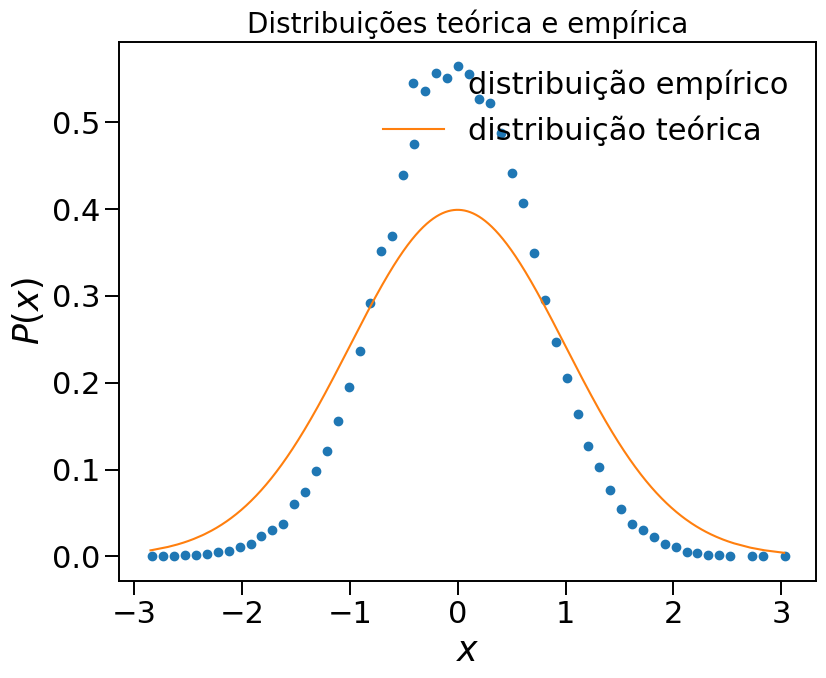

In [12]:
# Item (c) - Plot do Histograma <---------------
# Determina largura da gaussiana
a, m = 5, 100
n_samples = 50000
# Retorna lista de valores aceitos
samples = rejection_sampling(a, n_samples)
k_data, Pk_data = distribution_data(samples, a, m)
x_ord = sorted(samples)
pk_teo = [boltzmann_theoretical(i, a) for i in x_ord]
print(sum(pk_teo))
# Item (b) <---------------
# Visualizar os resultados
#x = np.linspace(-a, a, 1000)
fig = plt.subplots(figsize=(9, 7))
plt.plot(k_data, Pk_data,'o', label='distribuição empírico')
plt.plot(x_ord, pk_teo, label='distribuição teórica')
#plt.plot(x, P(x) / sum(P(x)), label="Distribuição alvo (não normalizada)", color='red')
#plt.plot(samples, P(samples) / sum(P(samples)), label="Distribuição alvo (não normalizada)", color='red')
plt.legend(prop={"size": 22}, fancybox=True, framealpha=0.0)
plt.xlabel(r"$x$", size=25)
plt.ylabel(r"$P(x)$", size=25)
plt.title("Distribuições teórica e empírica", size=20)
plt.tick_params('both', width=1.4, length=10, labelsize=22)
plt.show()

In [18]:
e = sum([k*Pk for k,Pk in zip(k_data, Pk_data)])/len(k_data)
var = sum([(k-e)**2 for k in k_data])/(len(k_data)-1)
e, var

(0.0008838596491227976, 2.8517378624973198)

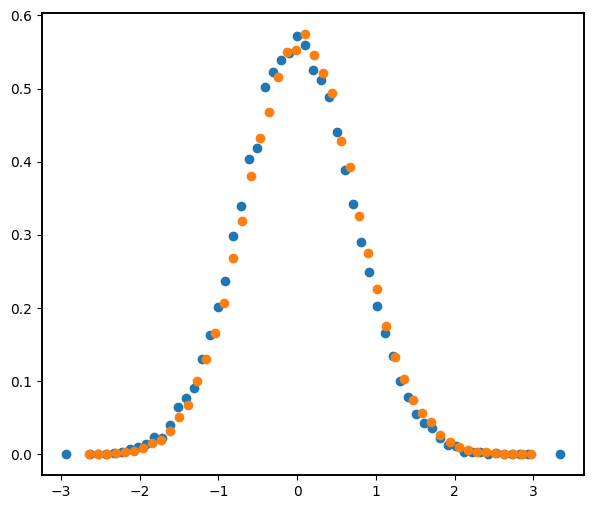

In [ ]:
A = np.histogram(samples, bins=50, density=True)
#print(A[1])
# Determina largura da gaussiana
a = 5
n_samples = 50000
# Retorna lista de valores aceitos
samples = rejection_sampling(a, n_samples)
k_data, Pk_data = distribution_data(samples, a)

fig = plt.subplots(figsize=(7, 6))
plt.plot(k_data, Pk_data,'o')
plt.plot(A[1][1:], A[0],'o')
plt.show()
